In [1]:
import numpy as np
from matplotlib import pyplot as plt

<h1 align="center">Volume 4: Timber Harvest.</h1>

    NAME Caelan Osman
    Section 2
    DATE March 2022

# Problem 1

Write a function that takes as input scalars $x_{0}$, $k$, $r$, and a final time $T$ and solves the optimal control problem stated above using the RK4 method described above. The function will return the time-step and the values of x and u at the specific time-steps.

In [2]:
# shooting method function to ensure convergence
def find_sol(a0, a1, x0, k, r, T, N=1000, delta=0.001, maxI=40, tol=1e-4):


    for _ in range(maxI):

        t1, x1, u1, alpha1 = RK4(a0, x0, k, r, T, N=N, delta=delta)
        t2, x2, u2, alpha2 = RK4(a1, x0, k, r, T, N=N, delta=delta)

        if np.abs(alpha2[-1]) < tol:
            break

        a2 = a1 - alpha2[-1] *(a1 - a0) / (alpha2[-1] - alpha1[-1]) 
        a0 = a1
        a1 = a2

    return t2, x2, u2


def RK4(a0, x0, k, r, T, N=1000, delta=0.001):
    """ Use the RK4 method to compute an approximate solution
    to the ODE y' = f(t, y) at n equispaced parameter values from t0 to t
    with initial conditions y(t0) = y0.
    This function returns an array Y of shape (n,) if
    y is a constant or an array of size 1.
    It returns an array of shape (n, y.size) otherwise.
    In either case, Y[i] is the approximate value of y at
    the i'th value of np.linspace(t0, tf, n).
    """
    # initialize parameters
    t = np.linspace(0,T,N+1)
    h = T/N
    h2 = h/2
    # initalize x
    x = np.zeros(N+1)
    # initalize alpha
    alpha = np.zeros(N+1)
    alpha[0] = a0
    # initialize u
    u = np.zeros(N+1)
    x[0] = x0

    # vector field equation for alpha
    def f(u_, α_, t_):
        return 1*(u_*(np.exp(-r*t_) - k*α_) - np.exp(-r*t_))

    test = -np.inf
    oldu = np.zeros(N+1)
    oldx = np.zeros(N+1)
    oldalpha = np.zeros(N+1)
    iters = 0
    while test < 0: 
        for i in range(N):

            # update x
            k1 = k*u[i]*x[i]
            k2 = k*1/2*(u[i] + u[i+1])*(x[i]+h2*k1)
            k3 = k*1/2*(u[i] + u[i+1])*(x[i]+h2*k2)
            k4 = k*u[i+1] * (x[i]+h*k3)
            x[i+1] = x[i]+h/6*(k1+2*k2+2*k3+k4)

            # update alpha, go backwards
            j = N-i
            K1 = f(u[j], alpha[j], t[j])
            K2 = f(0.5*(u[j] + u[j-1]), alpha[j] - h2*K1, t[j] - h2)
            K3 = f(0.5*(u[j] + u[j-1]), alpha[j] - h2*K2, t[j] - h2)
            K4 = f(u[j], alpha[j] - h*K3, t[j] - h)
            alpha[j-1] = alpha[j] - h*(K1 + 2*K2 + 2*K3 + K4)/6 
        
        # get coefficient on u
        coeffs = x*(k*alpha - np.exp(-r*t))
        # get sign of coefficients
        sign = np.sign(coeffs)

        # calculate u
        u = np.where(sign == 1, sign, sign*0)
        # update u
        u = (u+oldu)/2

        temp1 = delta*np.sum(np.abs(u)) - np.sum(np.abs(oldu - u))
        temp2 = delta*np.sum(np.abs(x)) - np.sum(np.abs(oldx - x))
        temp3 = delta*np.sum(np.abs(alpha)) - np.sum(np.abs(oldalpha - alpha))
        test = np.min([temp1, np.min([temp2, temp3])])

        oldu = u.copy()
        oldx = x.copy()
        oldalpha = alpha.copy()

    return t, x, u, alpha

# Problem 2

Using your function from problem 1, plot time vs. timber production ($x$) and plot time vs. reinvestment percentage ($u$) for the following values: $x_{0} = 100$, $k = 1$, $r = 0$, and $T = 5$.


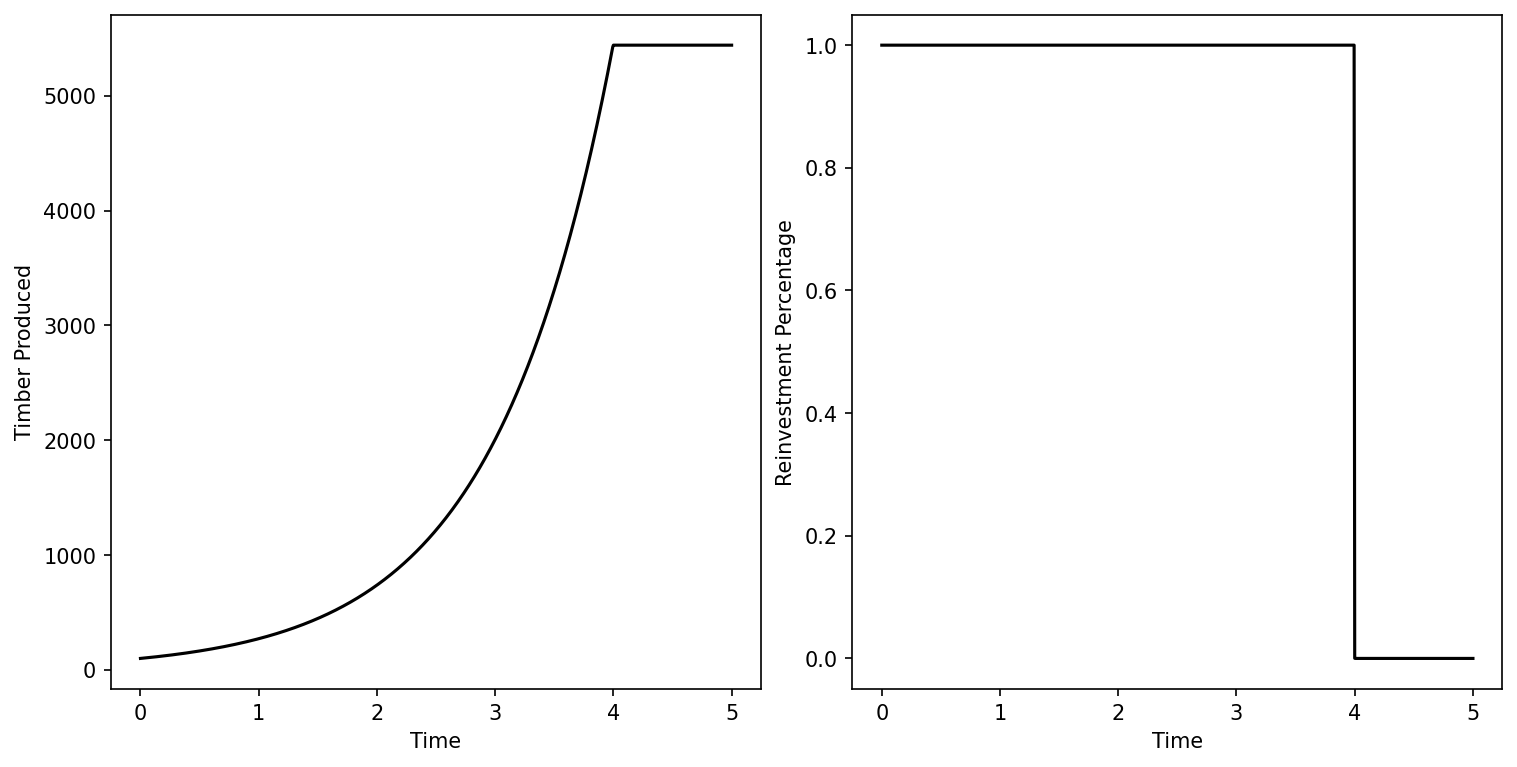

In [3]:
# set initial condtioins
x0 = 100
k = 1
r = 0
T = 5
a0 = 0

# solve
t, x, u, alpha = RK4(a0, x0, k, r, T)

# now we plot
fig = plt.figure(constrained_layout=True, figsize=(10, 5))
fig.set_dpi(150)
ax = fig.add_subplot(121)
ax.plot(t, x, 'k-')
ax.set_xlabel('Time')
ax.set_ylabel('Timber Produced')

ax = fig.add_subplot(122)
ax.plot(t, u, 'k-')
ax.set_xlabel('Time')
ax.set_ylabel('Reinvestment Percentage')

plt.show()

# Problem 3

Plot the same graphs that you did in problem 2, but instead for the following values: $x_{0} = 100$, $k = 0.3$, $r = 0.05$, and $T = 5$. At what time does the switching point occur?

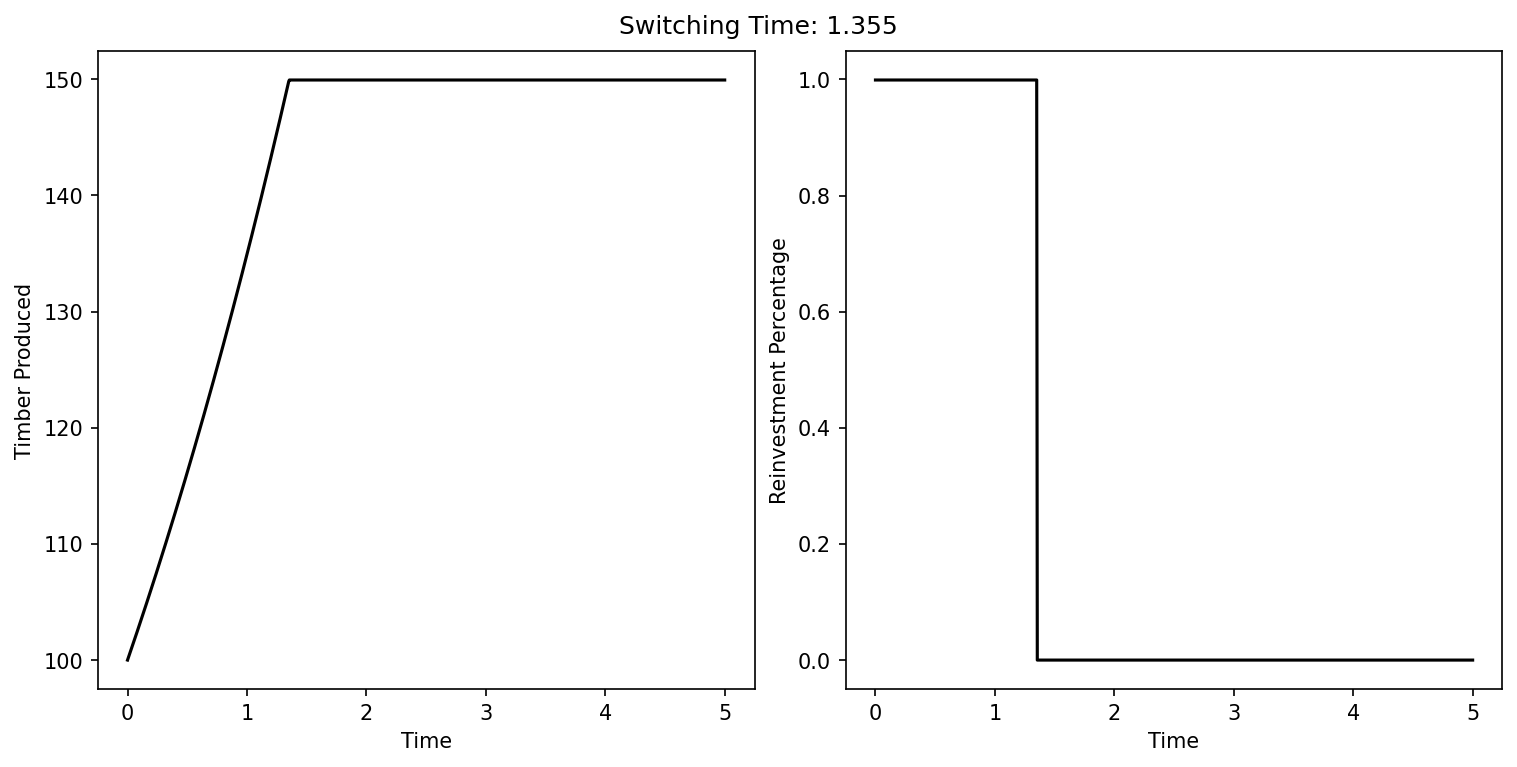

In [4]:
x0 = 100
k = 0.3
r = 0.05
T = 5
a0 = 0

t, x, u, alpha = RK4(a0, x0, k, r, T)

fig = plt.figure(constrained_layout=True, figsize=(10, 5))
fig.set_dpi(150)
ax = fig.add_subplot(121)
ax.plot(t, x, 'k-')
ax.set_xlabel('Time')
ax.set_ylabel('Timber Produced')

ax = fig.add_subplot(122)
ax.plot(t, u, 'k-')
ax.set_xlabel('Time')
ax.set_ylabel('Reinvestment Percentage')

plt.suptitle('Switching Time: ' + str(t[np.argmin(u)]))

plt.show()

# Problem 4

Now use the same parameters as in problem 3, but vary the initial value of the timber production capacity ($x_{0}$). You should try a smaller value, a slightly larger value, and fairly larger value for $x_{0}$. What do you notice about the optimal controls (are they the same or are they different)?


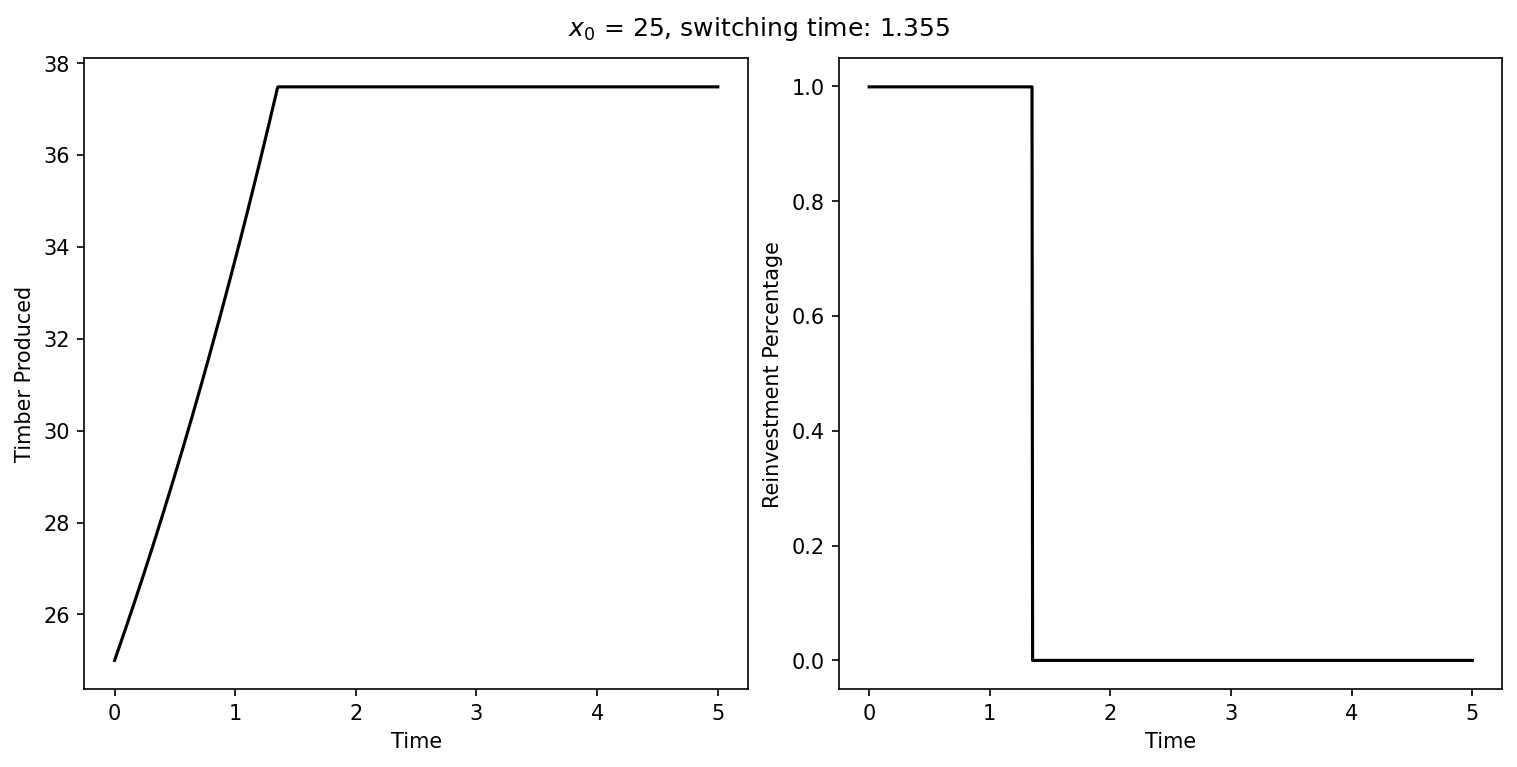

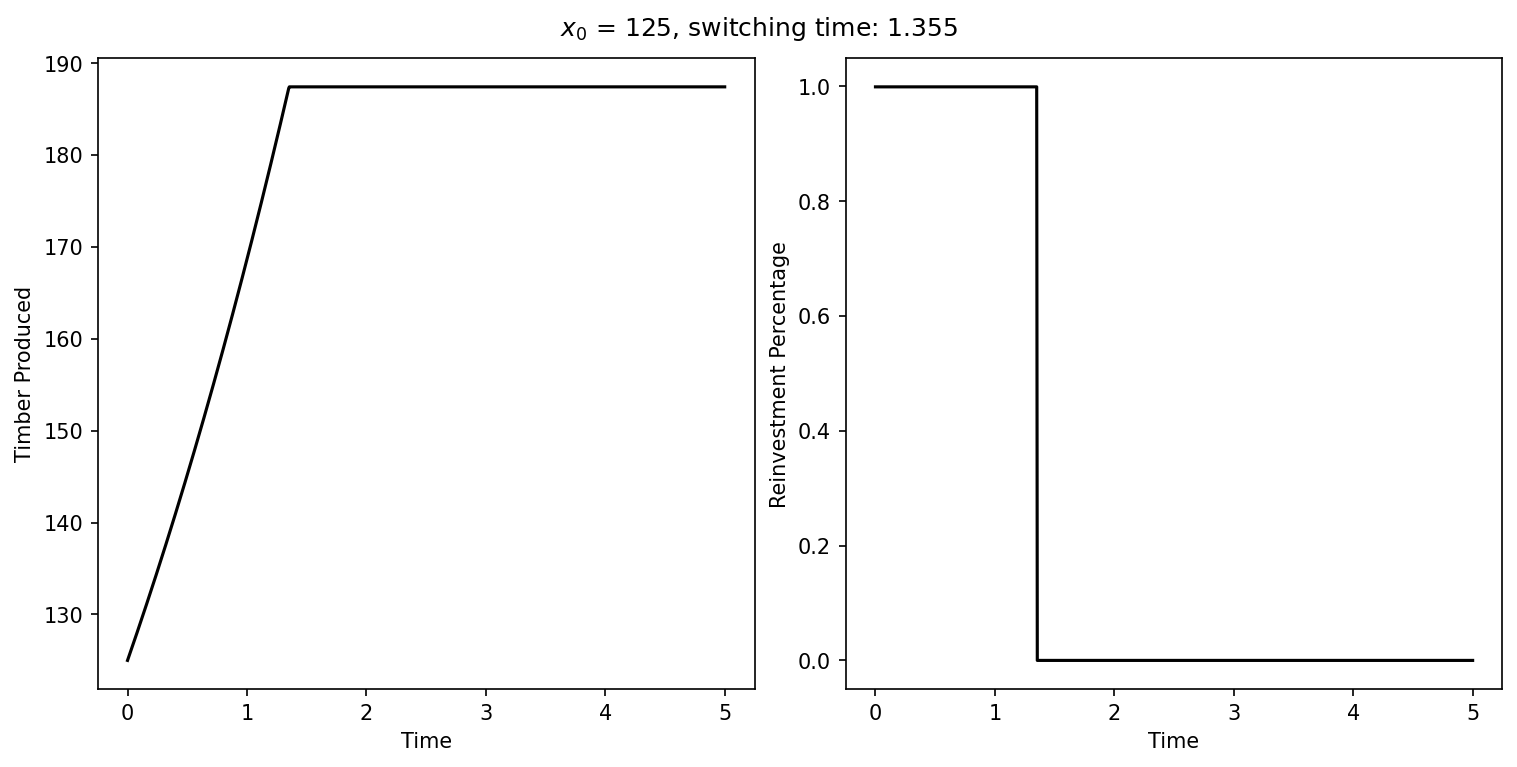

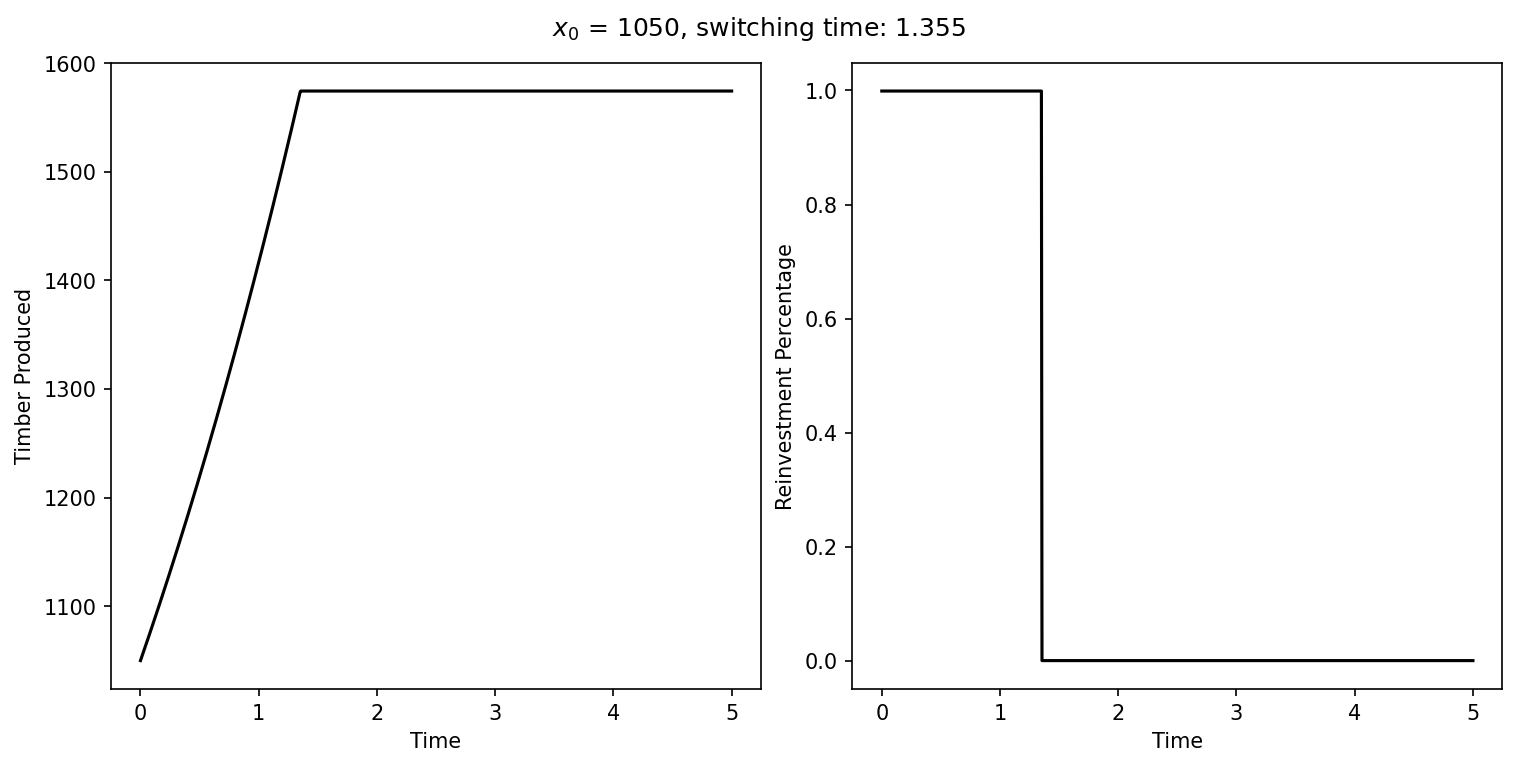

In [5]:
# solve for small value of x0
x0 = 25
k = 0.3
r = 0.05
T = 5
a0 = 0

# solve
t, x, u, alpha = RK4(a0, x0, k, r, T)

# plot
fig = plt.figure(constrained_layout=True, figsize=(10, 5))
fig.set_dpi(150)
ax = fig.add_subplot(121)
ax.plot(t, x, 'k-')
ax.set_xlabel('Time')
ax.set_ylabel('Timber Produced')

ax = fig.add_subplot(122)
ax.plot(t, u, 'k-')
ax.set_xlabel('Time')
ax.set_ylabel(r'Reinvestment Percentage')
plt.suptitle(r'$x_0$ = ' + str(x0) + ', switching time: ' + str(t[np.argmin(u)]))
plt.show()



# solve for slightly larger value of x0
x0 = 125
k = 0.3
r = 0.05
T = 5

# solve
t, x, u, alpha = RK4(a0, x0, k, r, T)

# plot
fig = plt.figure(constrained_layout=True, figsize=(10, 5))
fig.set_dpi(150)
ax = fig.add_subplot(121)
ax.plot(t, x, 'k-')
ax.set_xlabel('Time')
ax.set_ylabel('Timber Produced')

ax = fig.add_subplot(122)
ax.plot(t, u, 'k-')
ax.set_xlabel('Time')
ax.set_ylabel('Reinvestment Percentage')
plt.suptitle(r'$x_0$ = ' + str(x0) + ', switching time: ' + str(t[np.argmin(u)]))
plt.show()

# solve for much larger value of x0
x0 = 1050
k = 0.3
r = 0.05
T = 5

t, x, u, alpha = RK4(a0, x0, k, r, T)

fig = plt.figure(constrained_layout=True, figsize=(10, 5))
fig.set_dpi(150)
ax = fig.add_subplot(121)
ax.plot(t, x, 'k-')
ax.set_xlabel('Time')
ax.set_ylabel('Timber Produced')
ax = fig.add_subplot(122)
ax.plot(t, u, 'k-')
ax.set_xlabel('Time')
ax.set_ylabel('Reinvestment Percentage')
plt.suptitle(r'$x_0$ = ' + str(x0) + ', switching time: ' + str(t[np.argmin(u)]))

plt.show()

As we can see, the switching times are the same, thus the optimal controls are all equivalent. 